In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

# Read file

In [ ]:
import mdfreader 

fileName = "C:\\Users\\bnguitto\\Desktop\\ECU\\data\\CAN_UDS_Data 2019-02-23 13-54-58-056605 Partition 0.dat"

def read_data(fileName):
    # read data from a mdf file
    # and print value for every key
    raw_dict = mdfreader.Mdf(fileName)
    for key in raw_dict.keys():
        print(key)
    return raw_dict

dict = read_data(fileName)

In [5]:
# Convert the dict to a pandas dataframe
def toDataframe(dic,time):
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    for key in dic.keys():
        if (dic[key]['master'] == time):
            df1[key] = dic[key]['data']
            df2[key] = [dic[key]['description'],dic[key]['unit']]
    return df1, df2 

df1,df2 = toDataframe(dict,'time_1')

# Statistics

#### Distribution

In [ ]:
# Column histogram
df1.hist('Tra_numGear',bins = 5)

In [ ]:
# Plot values over time
plt.plot(df1['time_1'],df1['ActMod_trqClth'])
plt.xlabel('time (s)')

#### Correlations

In [ ]:
# Compute correlation matrix
corr = df1.corr()

# Find correlation pairs from correlation matrix
pairs = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()

# Keep values above a high enough threshold
pairs = pairs.where(pairs>0.95).dropna()
plt.plot(pairs.values)

Text(0, 0.5, 'Actual percent engine torque')

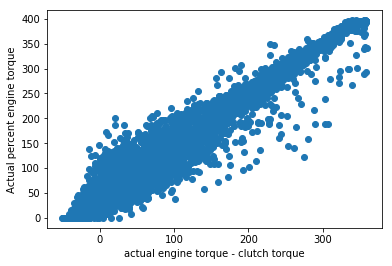

In [7]:
# Visualize correlation
plt.scatter(df1['ActMod_trqClth'],df1['PthLead_trqInrCurr'])
plt.xlabel('actual engine torque - clutch torque')
plt.ylabel('Actual percent engine torque')

# Channel selection and time sampling

In [6]:
def sampleData(dic,frequency):
    df = pd.DataFrame()
    times = []
    maxTime = 0
    for key in dic.keys():
        if key[0:4] == 'time':
            times.append(key)
            if dic[key]['data'].max() > maxTime:
                maxTime = dic[key]['data'].max()
    for time in times:
        df1,df2 = toDataframe(dic, time)
        for t in np.arange(0, maxTime, 1/frequency):
            subset = df1.loc[(df1[time]>=(t-((1/frequency)/2))) & (df1[time]<(t+((1/frequency)/2)))]
            subsetMean = subset.mean()
            subsetMean[time] = t
            for key in subsetMean.keys():
                if key not in times[1:]:
                    df.loc[t*frequency, key] = subsetMean[key]           
    return df

In [ ]:
fileNames0 = ['drivingCycle00\\00_drivingCycle00.dat','drivingCycle00\\01_drivingCycle00.dat','drivingCycle00\\02_drivingCycle00.dat','drivingCycle00\\03_drivingCycle00.dat','drivingCycle00\\04_drivingCycle00.dat','drivingCycle00\\05_drivingCycle00.dat','drivingCycle00\\06_drivingCycle00.dat','drivingCycle00\\07_drivingCycle00.dat','drivingCycle00\\08_drivingCycle00.dat','drivingCycle00\\09_drivingCycle00.dat','drivingCycle00\\10_drivingCycle00.dat','drivingCycle00\\11_drivingCycle00.dat','drivingCycle00\\12_drivingCycle00.dat']
fileNames1 = ['drivingCycle01\\00_drivingCycle01.dat','drivingCycle01\\01_drivingCycle01.dat','drivingCycle01\\02_drivingCycle01.dat','drivingCycle01\\03_drivingCycle01.dat','drivingCycle01\\04_drivingCycle01.dat','drivingCycle01\\05_drivingCycle01.dat','drivingCycle01\\06_drivingCycle01.dat','drivingCycle01\\07_drivingCycle01.dat','drivingCycle01\\08_drivingCycle01.dat','drivingCycle01\\09_drivingCycle01.dat','drivingCycle01\\10_drivingCycle01.dat']
fileNames2 = ['drivingCycle02\\00_drivingCycle02.dat','drivingCycle02\\01_drivingCycle02.dat','drivingCycle02\\02_drivingCycle02.dat','drivingCycle02\\03_drivingCycle02.dat','drivingCycle02\\04_drivingCycle02.dat','drivingCycle02\\05_drivingCycle02.dat','drivingCycle02\\06_drivingCycle02.dat','drivingCycle02\\07_drivingCycle02.dat','drivingCycle02\\08_drivingCycle02.dat','drivingCycle02\\09_drivingCycle02.dat','drivingCycle02\\10_drivingCycle02.dat','drivingCycle02\\11_drivingCycle02.dat','drivingCycle02\\12_drivingCycle02.dat','drivingCycle02\\13_drivingCycle02.dat','drivingCycle02\\14_drivingCycle02.dat','drivingCycle02\\15_drivingCycle02.dat','drivingCycle02\\16_drivingCycle02.dat','drivingCycle02\\17_drivingCycle02.dat','drivingCycle02\\18_drivingCycle02.dat']
fileNames3 = ['drivingCycle03\\00_drivingCycle03.dat','drivingCycle03\\01_drivingCycle03.dat','drivingCycle03\\02_drivingCycle03.dat','drivingCycle03\\03_drivingCycle03.dat','drivingCycle03\\04_drivingCycle03.dat','drivingCycle03\\05_drivingCycle03.dat','drivingCycle03\\06_drivingCycle03.dat','drivingCycle03\\07_drivingCycle03.dat','drivingCycle03\\08_drivingCycle03.dat','drivingCycle03\\09_drivingCycle03.dat','drivingCycle03\\10_drivingCycle03.dat','drivingCycle03\\11_drivingCycle03.dat','drivingCycle03\\12_drivingCycle03.dat','drivingCycle03\\13_drivingCycle03.dat','drivingCycle03\\14_drivingCycle03.dat','drivingCycle03\\15_drivingCycle03.dat','drivingCycle03\\16_drivingCycle03.dat','drivingCycle03\\17_drivingCycle03.dat','drivingCycle03\\18_drivingCycle03.dat','drivingCycle03\\19_drivingCycle03.dat','drivingCycle03\\20_drivingCycle03.dat','drivingCycle03\\21_drivingCycle03.dat','drivingCycle03\\22_drivingCycle03.dat','drivingCycle03\\23_drivingCycle03.dat','drivingCycle03\\24_drivingCycle03.dat','drivingCycle03\\25_drivingCycle03.dat','drivingCycle03\\26_drivingCycle03.dat','drivingCycle03\\27_drivingCycle03.dat','drivingCycle03\\28_drivingCycle03.dat','drivingCycle03\\29_drivingCycle03.dat','drivingCycle03\\30_drivingCycle03.dat','drivingCycle03\\31_drivingCycle03.dat','drivingCycle03\\32_drivingCycle03.dat','drivingCycle03\\33_drivingCycle03.dat','drivingCycle03\\34_drivingCycle03.dat','drivingCycle03\\35_drivingCycle03.dat','drivingCycle03\\36_drivingCycle03.dat','drivingCycle03\\37_drivingCycle03.dat']
fileNames4 = ['drivingCycle04\\00_drivingCycle04.dat','drivingCycle04\\01_drivingCycle04.dat','drivingCycle04\\02_drivingCycle04.dat','drivingCycle04\\03_drivingCycle04.dat','drivingCycle04\\04_drivingCycle04.dat','drivingCycle04\\05_drivingCycle04.dat','drivingCycle04\\06_drivingCycle04.dat','drivingCycle04\\07_drivingCycle04.dat','drivingCycle04\\08_drivingCycle04.dat','drivingCycle04\\09_drivingCycle04.dat','drivingCycle04\\10_drivingCycle04.dat','drivingCycle04\\11_drivingCycle04.dat','drivingCycle04\\12_drivingCycle04.dat']

fileNames = [fileNames0, fileNames4]

for i in range(1,2): 
    for file in fileNames[i]:
        dic = mdfreader.Mdf(file)
        target = 'ECU10HZ\\csvCycle' + str(i) + '\\'
        df = sampleData(dic,10)
        filetab = file.split('\\')
        df.to_csv(target + filetab[len(filetab)-1] + '.csv')
        print (file + ' finished')